In [155]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import math

## 1. Знакомство с библиотеками

In [5]:
H = 256
W = 256

In [6]:
mat1 = np.zeros((H,W),dtype = np.uint8)
mat1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
mat1.fill(255)
mat1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

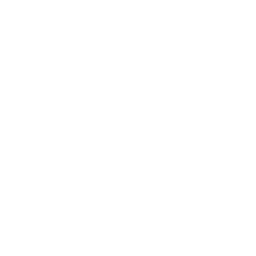

In [8]:
im = Image.fromarray(mat1)
im.save('first.png', 'png')
im

In [9]:
im = np.zeros((H, W, 3), dtype=np.uint8)
im[:, :] = np.array([255, 0, 0],dtype=np.uint8)

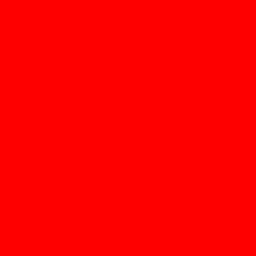

In [10]:
Image.fromarray(im)

In [11]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)

for y in range(H):
    for x in range(W):
        value = (x*y)%256
        image_array[y, x] = [value, value, value]

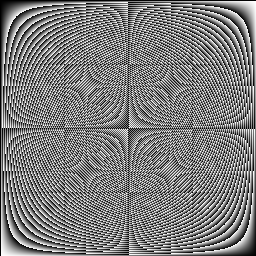

In [12]:
Image.fromarray(image_array)

## 2. Отрисовка прямых линий

In [156]:
class Drawline:
    def dotted_line(image, x0, y0, x1, y1, count, color):
        step = 1.0/count
        for t in np.arange(0,1,step):
            x = round((1.0 - t)*x0 + t*x1)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x] = color

    
    def dotted_line_v2(image, x0, y0, x1, y1, color):
        count = np.sqrt((x0-x1)**2+(y0-y1)**2)
        step = 1.0/count
        for t in np.arange(0,1,step):
            x = round((1.0 - t)*x0 + t*x1)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x] = color

    
    def x_loop_line(image, x0, y0, x1, y1, color):
        for x in range(round(x0), round(x1)):
            t = (x-x0)/(x1-x0)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x]=color

    
    def x_loop_line_hotfix_1(image, x0, y0, x1, y1, color):
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0
        for x in range(round(x0), round(x1)):
            t = (x-x0)/(x1-x0)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x]=color

    
    def x_loop_line_hotfix_2(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0
            
        for x in range(int(x0), int(x1)):
            t = (x-x0)/(x1-x0)
            y = round((1.0 - t)*y0 + t*y1)
            if xchange:
                image[x,y]=color
            else:
                image[y,x]=color

    
    def x_loop_line_v2(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0

        y = y0
        dy = abs(y1 - y0)/(x1 - x0)
        derror = 0.0
        y_update = 1 if y1 > y0 else -1

        for x in range(int(x0),int(x1)):
            if xchange:
                image[x,round(y)]=color
            else:
                image[round(y),x]=color
                
            derror += dy
            if derror > 0.5:
                derror -= 1
                y+= y_update
            
    def x_loop_v2_no_y_calc(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0

        y = y0
        dy = 2*abs(y1 - y0)#тут
        derror = 0.0
        y_update = 1 if y1 > y0 else -1

        for x in range(int(x0), int(x1)):
            if xchange:
                image[x,round(y)]=color
            else:
                image[round(y),x]=color

            derror += dy
            if (derror > (x1-x0)):#тут
                derror -= 2*(x1-x0)#тут
                y += y_update
            

    
    def x_loop_v2_no_y_calc_v2(image, x0, y0, x1, y1, color):
        pass

    
    def bresenham_line(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0

        y = y0
        dy = 2*abs(y1 - y0)#тут
        derror = 0.0
        y_update = 1 if y1 > y0 else -1

        for x in range(round(x0), round(x1)):
            if xchange:
                image[x,round(y)]=color
            else:
                image[round(y),x]=color

            derror += dy
            if (derror > (x1-x0)):#тут
                derror -= 2*(x1-x0)#тут
                y += y_update
            
        

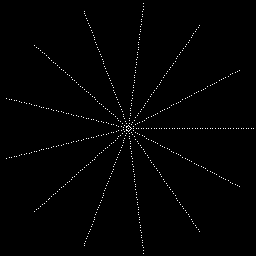

In [157]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.dotted_line(image_array, x0, y0, x1, y1, 50, np.array([255,255,255],dtype = np.uint8))
Image.fromarray(image_array)

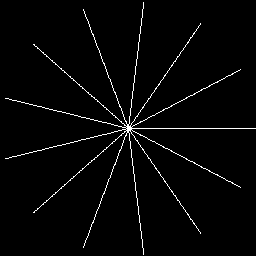

In [158]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.dotted_line_v2(image_array, x0, y0, x1, y1, np.array([255,255,255],dtype = np.uint8))
Image.fromarray(image_array)

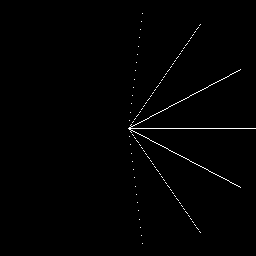

In [159]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

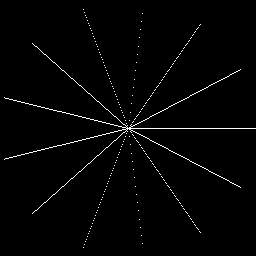

In [160]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line_hotfix_1(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

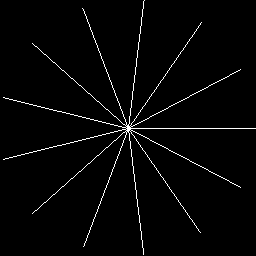

In [161]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line_hotfix_2(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

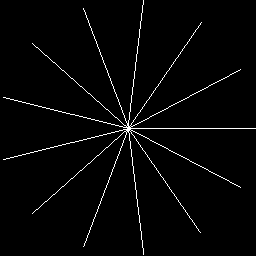

In [162]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line_v2(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

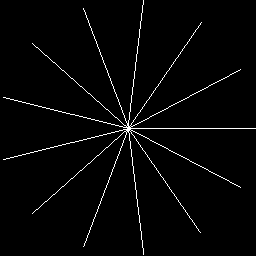

In [163]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_v2_no_y_calc(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

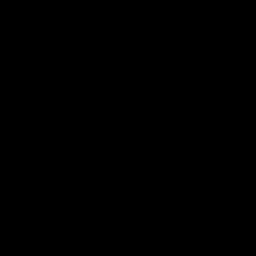

In [164]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_v2_no_y_calc_v2(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)
# тут не сделал тк случайно сделал в предыдущем

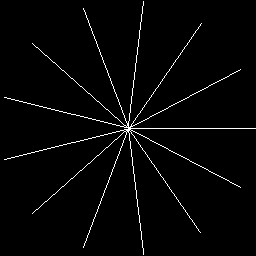

In [165]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.bresenham_line(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

## 3. Читаем .obj

In [166]:
def read_obj_file(file_path):
    points = []
    polygons = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts:
                if parts[0] == 'v':  # Вершины
                    point = tuple(map(float, parts[1:4]))
                    points.append(point)
                elif parts[0] == 'f':  # Грани
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    polygons.append(face)

    return points, polygons

# путь к файлу OBJ
obj_file_path = r"model_1.obj"

point_list, face_list = read_obj_file(obj_file_path)

## 4. Смотрим .obj

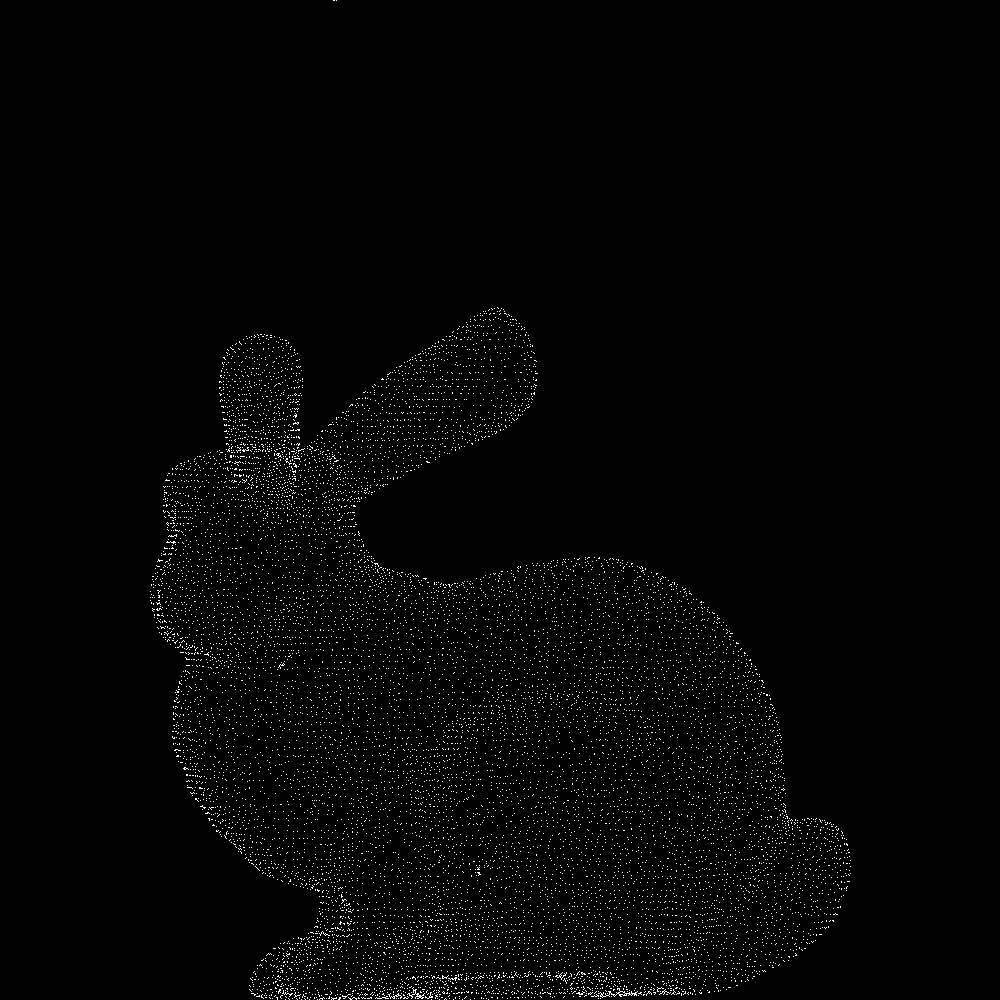

In [24]:
image = np.zeros((1000,1000),dtype=np.uint8)
for x,y,z in point_list:
    image[-round(y*7000)][round(x*7000+500)] = 255

Image.fromarray(image).convert('1')

## 5.-6. Рисуем линии .obj

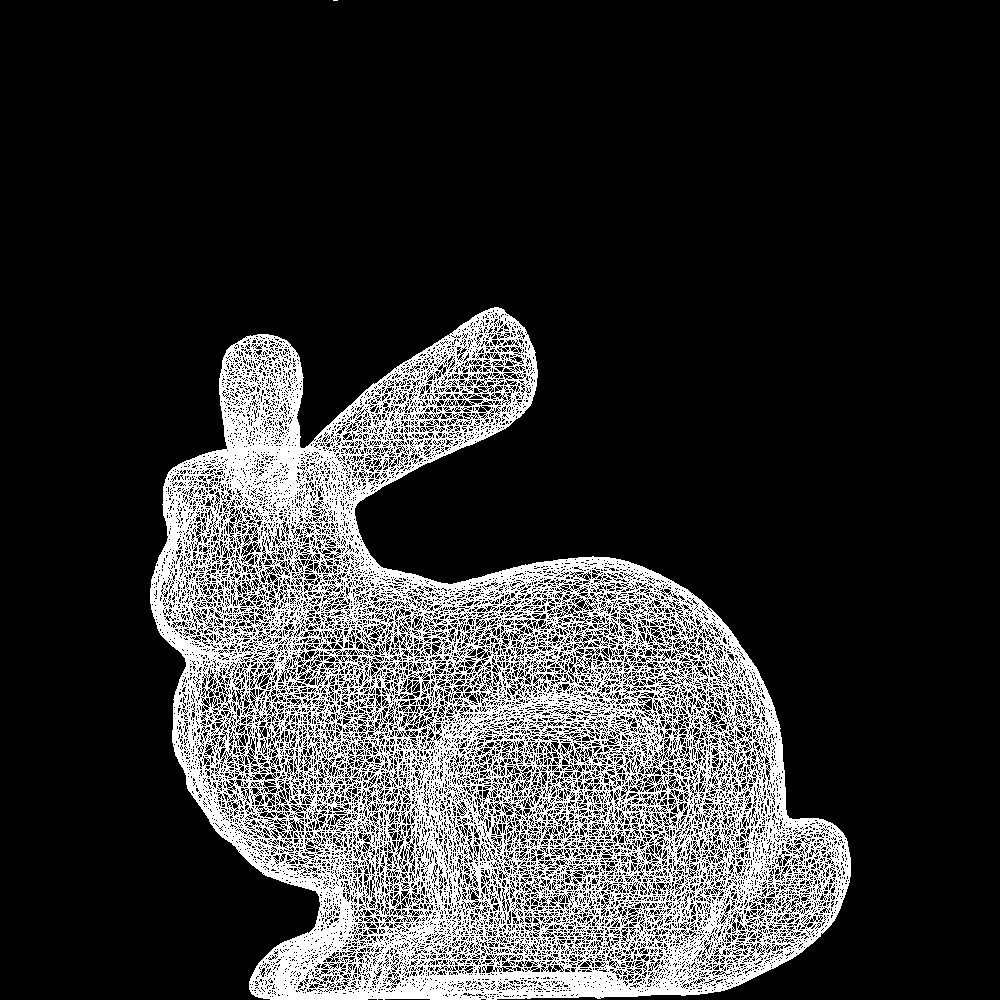

In [25]:
image = np.zeros((1000,1000),dtype=np.uint8)
for d in face_list:
    
    points = list(point_list[i] for i in d)
    for i in range(len(points)-1):
        x0 = points[i][0]*7000+500
        y0 = -points[i][1]*7000
        x1 = points[i+1][0]*7000+500
        y1 = -points[i+1][1]*7000
        Drawline.bresenham_line(image, x0, y0, x1, y1, 255)
        
    x0 = points[0][0]*7000+500
    y0 = -points[0][1]*7000
    x1 = points[-1][0]*7000+500
    y1 = -points[-1][1]*7000
    Drawline.bresenham_line(image, x0, y0, x1, y1, 255)
Image.fromarray(image).convert('P')

# Лаба 2

In [168]:
def bar_coords(x, y, x0, y0, x1, y1, x2, y2):
     lambda0 = ((x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)) / ((x0 - x2) * (y1 - y2) - (x1 - x2) * (y0 - y2))
     lambda1 = ((x0 - x2) * (y - y2) - (x - x2) * (y0 - y2)) / ((x0 - x2) * (y1 - y2) - (x1 - x2) * (y0 - y2))
     lambda2 = 1.0 - lambda0 - lambda1
     return lambda0, lambda1, lambda2

In [169]:
def draw_triangle(image, x0, y0, x1, y1, x2, y2, color):
    x_min = max(min((x0, x1, x2)), 0)
    x_max = max((x0, x1, x2))

    y_min = max(min((y0, y1, y2)), 0)
    y_max = max((y0, y1, y2))
    
    for x in range(int(x_min), round(x_max)):
        for y in range(int(y_min), round(y_max)):
            if np.all(np.array(bar_coords(x, y, x0, y0, x1, y1, x2, y2)) >= 0):
                image[-y][x] = color
    return image

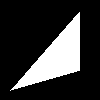

In [170]:
image = np.zeros((100,100),dtype=np.uint8)
x0, y0 = 10, 10
x1, y1 = 80, 90
x2, y2 = 80, 30

Image.fromarray(draw_triangle(image, x0, y0, x1, y1, x2, y2, 255))

In [171]:
#points list: [(x,y,z)

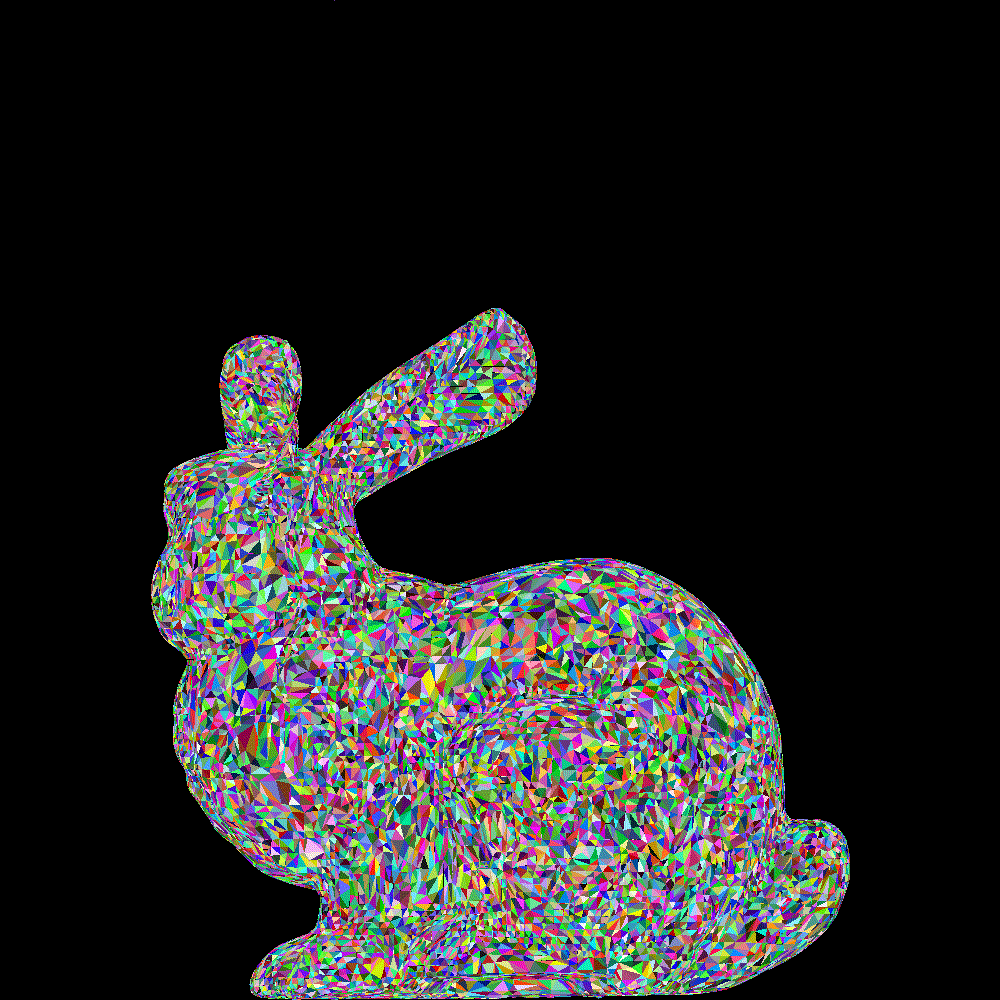

In [172]:
image = np.zeros((1000,1000,3),dtype=np.uint8)
for d in face_list:

    (x0,y0,z0), (x1,y1,z1), (x2,y2,z2) = (point_list[i] for i in d)
    draw_triangle(image, x0*7000+500, y0*7000, x1*7000+500, y1*7000, x2*7000+500, y2*7000, np.random.randint(255, size=3))
    
Image.fromarray(image).convert('P')

In [173]:
def norm(x0, y0, z0, x1, y1, z1, x2, y2, z2):
  return np.cross(np.array((x1-x2, y1-y2, z1-z2)), np.array((x1-x0, y1-y0, z1-z0)))

def cos_angle_of_light(norm, light):
    length_norm = np.linalg.norm(norm)
    return np.dot(norm, light)/length_norm

In [174]:
def draw_triangle_v2(image, x0, y0, z0, x1, y1, z1, x2, y2, z2, color):
    x_min = max(min((x0, x1, x2)), 0)
    x_max = max((x0, x1, x2))

    y_min = max(min((y0, y1, y2)), 0)
    y_max = max((y0, y1, y2))

    cos_of_light = cos_angle_of_light(norm(x0, y0, z0, x1, y1, z1, x2, y2, z2), [0,0,1])
    
    if cos_of_light > 0:
        return image
        
    for x in range(int(x_min), round(x_max)):
        for y in range(int(y_min), round(y_max)):
            if np.all(np.array(bar_coords(x, y, x0, y0, x1, y1, x2, y2)) >= 0):
                image[-y][x] = [-color*cos_of_light, 0, 0]
    return image

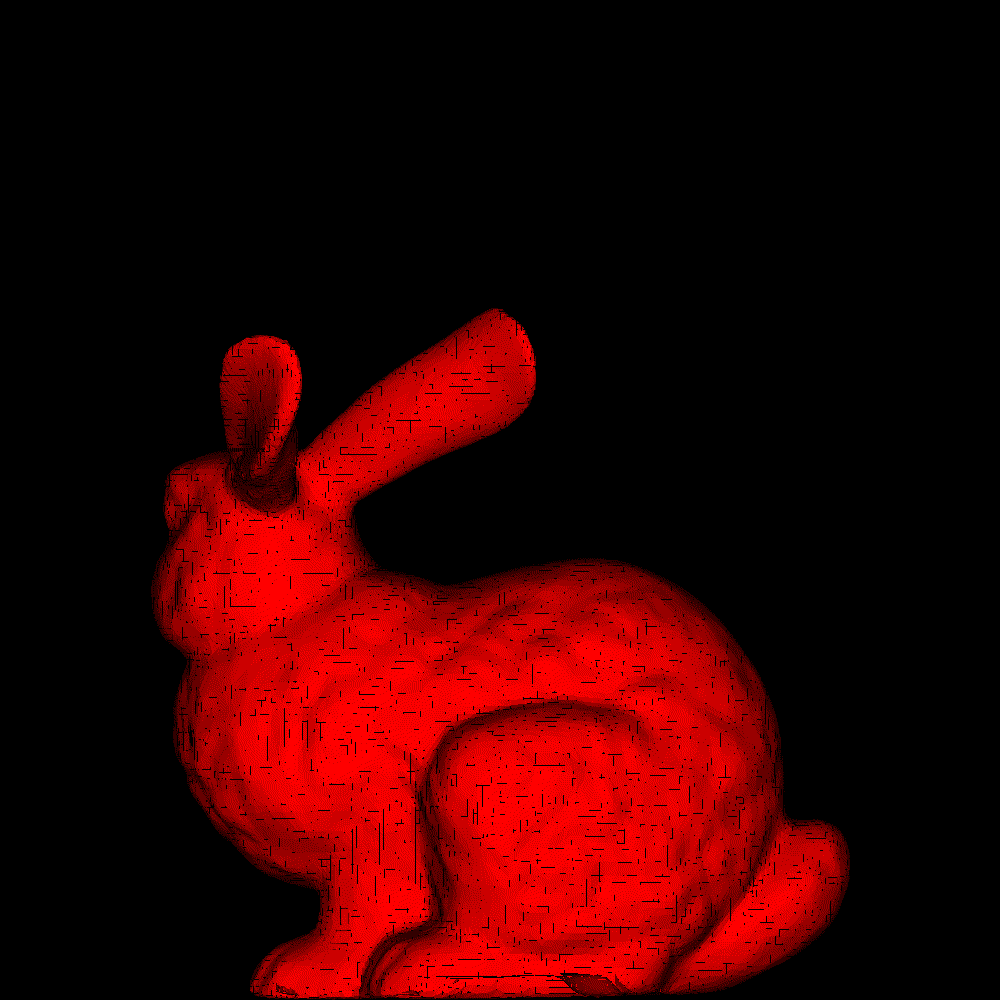

In [175]:
image = np.zeros((1000,1000,3),dtype=np.uint8)
for d in face_list:

    (x0,y0,z0), (x1,y1,z1), (x2,y2,z2) = (point_list[i] for i in d)
    draw_triangle_v2(image, x0*7000+500, y0*7000, z0*7000+500, x1*7000+500, y1*7000, z1*7000+500, x2*7000+500, y2*7000, z2*7000+500, 255)
    
Image.fromarray(image).convert('P')

In [176]:
def draw_triangle_v3(z_buff, image, x0, y0, z0, x1, y1, z1, x2, y2, z2, color):
    x_min = max(min((x0, x1, x2)), 0)
    x_max = max((x0, x1, x2))

    y_min = max(min((y0, y1, y2)), 0)
    y_max = max((y0, y1, y2))

    cos_of_light = cos_angle_of_light(norm(x0, y0, z0, x1, y1, z1, x2, y2, z2), [0,0,1])
    
    if cos_of_light > 0:
        return image
        
    for x in range(math.floor(x_min), math.ceil(x_max)):
        for y in range(math.floor(y_min), math.ceil(y_max)):
            bar_c = np.array(bar_coords(x, y, x0, y0, x1, y1, x2, y2))

            if z_buff[-y,x] < np.dot(np.array((z0, z1, z2)), bar_c):
                continue
            if np.all(bar_c >= 0):
                z_buff[-y][x] = np.dot(np.array((z0, z1, z2)), bar_c)
                image[-y][x] = [-color*cos_of_light, 0, 0]
    return image

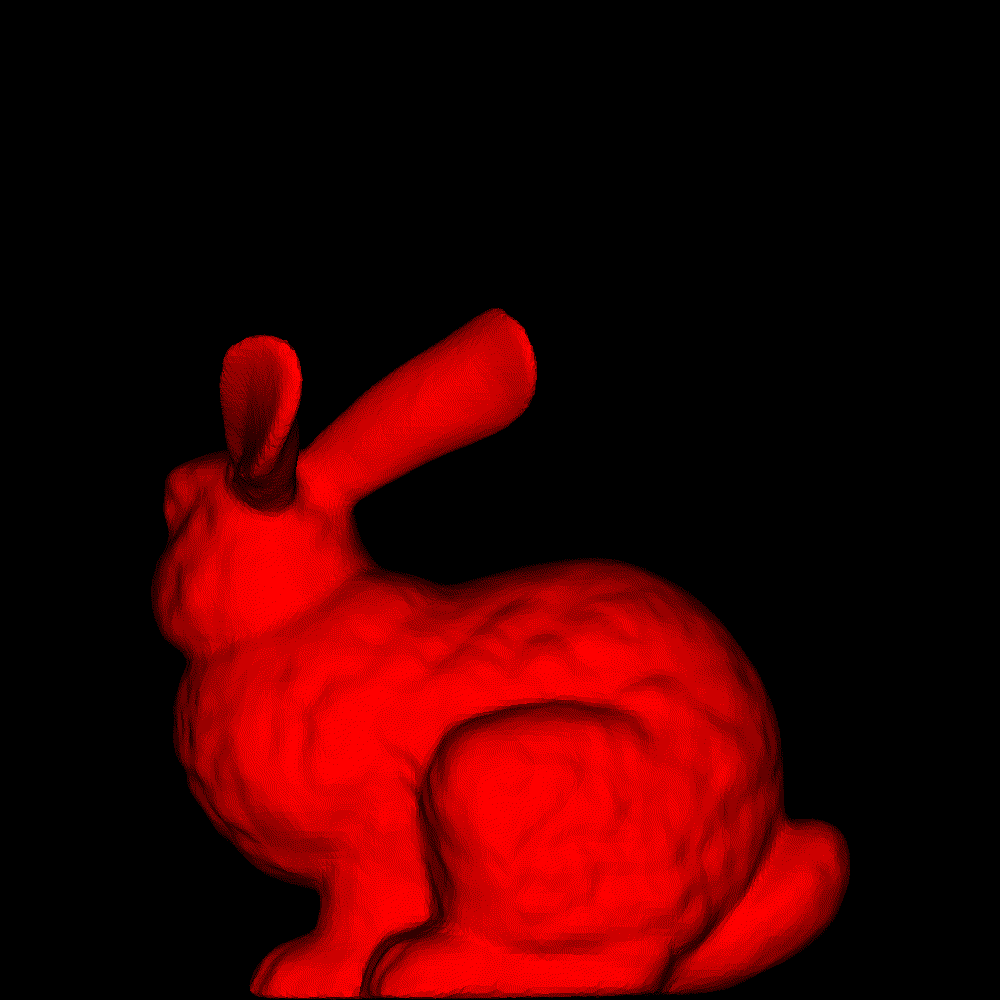

In [177]:
image = np.zeros((1000,1000,3),dtype=np.uint8)
z_buffer = np.full((1000,1000), np.inf)

for d in face_list:

    (x0,y0,z0), (x1,y1,z1), (x2,y2,z2) = (point_list[i] for i in d)
    draw_triangle_v3(z_buffer, image, x0*7000+500, y0*7000, z0*7000+500, x1*7000+500, y1*7000, z1*7000+500, x2*7000+500, y2*7000, z2*7000+500, 255)
    
Image.fromarray(image).convert('P')